# Análise de Ocorrências Aeronáuticas na Aviação Civil Brasileira

## Introdução

Nessa análise foram utilizados os dados da CENIPA (Centro de Investigação e Prevenção de Acidentes Aeronáuticos) da Força Aérea Brasileira, referentes as ocorrências aeronáuticas na aviação civil brasileira.

https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

Nesta base constam de dados as ocorrências aeronáuticas notificadas ao CENIPA nos últimos 10 anos e que ocorreram em solo brasileiro.

Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG).

## Modelo de Dados

![Imagem do modelo de relacionamento dos dados](./modelo_dados.png)

## Carregando o Dataset

In [1]:
# importanto blibliotecas
import pandas as pd

In [2]:
# carregando datasets
df = pd.read_csv(
        './datasets/ocorrencia_2010_2020.csv',
        sep=';',
        parse_dates=["ocorrencia_dia", "divulgacao_dia_publicacao"],
        dayfirst=True, na_values=["*", "**", "***", "****", "*****", "###!", "####", "+"]
    )

In [3]:
# exibindo 5 primeiros registros
df.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,40211,40211,40211,40211,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,2010-01-03,12:00:00,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,...,2010-01-03,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,2010-01-03,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,...,2010-01-04,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,...,2010-01-05,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO


## Transformação e Limpeza

In [4]:
# tamanho do dataset (rows x cols)
df.shape

(5752, 22)

In [5]:
# verificando tipos de dados
df.dtypes

codigo_ocorrencia                          int64
codigo_ocorrencia1                         int64
codigo_ocorrencia2                         int64
codigo_ocorrencia3                         int64
codigo_ocorrencia4                         int64
ocorrencia_classificacao                  object
ocorrencia_latitude                       object
ocorrencia_longitude                      object
ocorrencia_cidade                         object
ocorrencia_uf                             object
ocorrencia_pais                           object
ocorrencia_aerodromo                      object
ocorrencia_dia                    datetime64[ns]
ocorrencia_hora                           object
investigacao_aeronave_liberada            object
investigacao_status                       object
divulgacao_relatorio_numero               object
divulgacao_relatorio_publicado            object
divulgacao_dia_publicacao         datetime64[ns]
total_recomendacoes                        int64
total_aeronaves_envo

In [6]:
# verificando dados nulos
df.isnull().sum()

codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_latitude               2295
ocorrencia_longitude              2297
ocorrencia_cidade                    0
ocorrencia_uf                        1
ocorrencia_pais                      0
ocorrencia_aerodromo              2349
ocorrencia_dia                       0
ocorrencia_hora                      1
investigacao_aeronave_liberada    2482
investigacao_status                340
divulgacao_relatorio_numero       3802
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         4258
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64

In [7]:
# verificando único registro com ocorrencia_hora vazio
df.loc[df['ocorrencia_hora'].isnull()]

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
4100,78823,78823,78823,78823,78823,INCIDENTE,NaN,NaN,CORUMBÁ,MS,...,2017-07-09,NaN,NaN,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO


In [8]:
# verificando categorias possíveis para ocorrencia_classificacao
df['ocorrencia_classificacao'].unique()

array(['INCIDENTE', 'ACIDENTE', 'INCIDENTE GRAVE'], dtype=object)

In [9]:
# verificando categorias possíveis para investigacao_aeronave_liberada
df['investigacao_aeronave_liberada'].unique()

array(['SIM', nan, 'NÃO'], dtype=object)

In [10]:
# verificando categorias possíveis para investigacao_status
df['investigacao_status'].unique()

array(['FINALIZADA', nan, 'ATIVA'], dtype=object)

In [11]:
# verificando categorias possíveis para divulgacao_relatorio_publicado
df['divulgacao_relatorio_publicado'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [12]:
# verificando categorias possíveis para ocorrencia_saida_pista
df['ocorrencia_saida_pista'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [13]:
# convertendo lat e lng para numero
df['ocorrencia_latitude'] = pd.to_numeric(df['ocorrencia_latitude'], errors='coerce')
df['ocorrencia_longitude'] = pd.to_numeric(df['ocorrencia_longitude'], errors='coerce')

In [14]:
df.dtypes

codigo_ocorrencia                          int64
codigo_ocorrencia1                         int64
codigo_ocorrencia2                         int64
codigo_ocorrencia3                         int64
codigo_ocorrencia4                         int64
ocorrencia_classificacao                  object
ocorrencia_latitude                      float64
ocorrencia_longitude                     float64
ocorrencia_cidade                         object
ocorrencia_uf                             object
ocorrencia_pais                           object
ocorrencia_aerodromo                      object
ocorrencia_dia                    datetime64[ns]
ocorrencia_hora                           object
investigacao_aeronave_liberada            object
investigacao_status                       object
divulgacao_relatorio_numero               object
divulgacao_relatorio_publicado            object
divulgacao_dia_publicacao         datetime64[ns]
total_recomendacoes                        int64
total_aeronaves_envo

In [15]:
# preenchendo ocorrencia_hora vazio
df['ocorrencia_hora'].fillna("00:00:00", inplace=True)

In [16]:
df['ocorrencia_hora'].isnull().sum()

0

In [17]:
# juntando ocorrencia_dia e ocorrencia_hora
df['ocorrencia_dia_hora'] = pd.to_datetime(df['ocorrencia_dia'].astype(str) + " " + df['ocorrencia_hora'])

In [18]:
df.dtypes

codigo_ocorrencia                          int64
codigo_ocorrencia1                         int64
codigo_ocorrencia2                         int64
codigo_ocorrencia3                         int64
codigo_ocorrencia4                         int64
ocorrencia_classificacao                  object
ocorrencia_latitude                      float64
ocorrencia_longitude                     float64
ocorrencia_cidade                         object
ocorrencia_uf                             object
ocorrencia_pais                           object
ocorrencia_aerodromo                      object
ocorrencia_dia                    datetime64[ns]
ocorrencia_hora                           object
investigacao_aeronave_liberada            object
investigacao_status                       object
divulgacao_relatorio_numero               object
divulgacao_relatorio_publicado            object
divulgacao_dia_publicacao         datetime64[ns]
total_recomendacoes                        int64
total_aeronaves_envo

In [19]:
df.isnull().sum()

codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_latitude               2855
ocorrencia_longitude              2851
ocorrencia_cidade                    0
ocorrencia_uf                        1
ocorrencia_pais                      0
ocorrencia_aerodromo              2349
ocorrencia_dia                       0
ocorrencia_hora                      0
investigacao_aeronave_liberada    2482
investigacao_status                340
divulgacao_relatorio_numero       3802
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         4258
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
ocorrencia_dia_hora                  0
dtype: int64

In [20]:
# removendo colunas ocorrencia_dia e ocorrencia_hora
df.drop(['ocorrencia_dia', 'ocorrencia_hora'], axis=1, inplace=True)

In [21]:
df.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_aerodromo,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_hora
0,40211,40211,40211,40211,40211,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,NaN,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-03 12:00:00
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,...,SBBE,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-03 11:05:00
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,SBRJ,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-03 03:00:00
3,39527,39527,39527,39527,39527,ACIDENTE,-13.106667,-55.993056,LUCAS DO RIO VERDE,MT,...,NaN,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO,2010-01-04 17:30:00
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,...,SBPK,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-05 19:25:00


## Validação de Schema

In [22]:
# importando bliblioteca pandera
import pandera as pa

In [23]:
# definindo o schema
schema = pa.DataFrameSchema(
    columns = {
        "codigo_ocorrencia": pa.Column(pa.Int),
        "codigo_ocorrencia1": pa.Column(pa.Int),
        "codigo_ocorrencia2": pa.Column(pa.Int),
        "codigo_ocorrencia3": pa.Column(pa.Int),
        "codigo_ocorrencia4": pa.Column(pa.Int),
        "ocorrencia_classificacao": pa.Column(pa.String, nullable=True),
        "ocorrencia_latitude": pa.Column(pa.Float, nullable=True),
        "ocorrencia_longitude": pa.Column(pa.Float, nullable=True),
        "ocorrencia_cidade": pa.Column(pa.String, nullable=True),
        "ocorrencia_uf": pa.Column(pa.String, pa.Check.str_length(2, 2), nullable=True),
        "ocorrencia_pais": pa.Column(pa.String, nullable=True),
        "ocorrencia_aerodromo": pa.Column(pa.String, nullable=True),
        "investigacao_aeronave_liberada": pa.Column(pa.String, nullable=True),
        "investigacao_status": pa.Column(pa.String, nullable=True),
        "divulgacao_relatorio_numero": pa.Column(pa.String, nullable=True),
        "divulgacao_relatorio_publicado": pa.Column(pa.String, nullable=True),
        "divulgacao_dia_publicacao": pa.Column(pa.DateTime, nullable=True),
        "total_recomendacoes": pa.Column(pa.Int, nullable=True),
        "total_aeronaves_envolvidas": pa.Column(pa.Int, nullable=True),
        "ocorrencia_saida_pista": pa.Column(pa.String, nullable=True),
        "ocorrencia_dia_hora": pa.Column(pa.DateTime, nullable=True),
    }
)

In [24]:
# aplicando validação
schema.validate(df)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_aerodromo,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_hora
0,40211,40211,40211,40211,40211,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,NaN,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-03 12:00:00
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,...,SBBE,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-03 11:05:00
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,SBRJ,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-03 03:00:00
3,39527,39527,39527,39527,39527,ACIDENTE,-13.106667,-55.993056,LUCAS DO RIO VERDE,MT,...,NaN,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO,2010-01-04 17:30:00
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,...,SBPK,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-05 19:25:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5747,79804,79804,79804,79804,79804,INCIDENTE,-23.006944,-47.134444,CAMPINAS,SP,...,SBKP,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2020-12-29 19:00:00
5748,79757,79757,79757,79757,79757,INCIDENTE GRAVE,-10.804722,-49.756389,LAGOA DA CONFUSÃO,TO,...,NaN,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2020-12-30 18:30:00
5749,79802,79802,79802,79802,79802,INCIDENTE,-22.810000,-43.250556,RIO DE JANEIRO,RJ,...,SBGL,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2020-12-30 00:54:00
5750,79756,79756,79756,79756,79756,INCIDENTE GRAVE,-22.507222,-54.364167,VICENTINA,MS,...,NaN,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2020-12-31 09:00:00


## Análise Exploratória

In [25]:
# estatísticas básicas
df.describe()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_latitude,ocorrencia_longitude,total_recomendacoes,total_aeronaves_envolvidas
count,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,2.897000e+03,2.901000e+03,5752.000000,5752.000000
mean,58504.211926,58504.211926,58504.211926,58504.211926,58504.211926,-9.074827e+03,-2.089637e+07,0.303894,1.011996
std,14060.291611,14060.291611,14060.291611,14060.291611,14060.291611,4.874235e+05,1.116580e+09,1.153253,0.113566
min,39115.000000,39115.000000,39115.000000,39115.000000,39115.000000,-2.623500e+07,-6.013827e+10,0.000000,1.000000
25%,46366.500000,46366.500000,46366.500000,46366.500000,46366.500000,-2.343194e+01,-5.252667e+01,0.000000,1.000000
50%,52692.500000,52692.500000,52692.500000,52692.500000,52692.500000,-2.059944e+01,-4.855250e+01,0.000000,1.000000
75%,77653.750000,77653.750000,77653.750000,77653.750000,77653.750000,-1.250917e+01,-4.636167e+01,0.000000,1.000000
max,79874.000000,79874.000000,79874.000000,79874.000000,79874.000000,5.558222e+01,4.875750e+02,23.000000,3.000000


In [26]:
df.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_aerodromo,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_hora
0,40211,40211,40211,40211,40211,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,NaN,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-03 12:00:00
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,...,SBBE,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-03 11:05:00
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,SBRJ,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-03 03:00:00
3,39527,39527,39527,39527,39527,ACIDENTE,-13.106667,-55.993056,LUCAS DO RIO VERDE,MT,...,NaN,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO,2010-01-04 17:30:00
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,...,SBPK,SIM,FINALIZADA,NaN,NÃO,NaT,0,1,NÃO,2010-01-05 19:25:00


### Quantidade de ocorrêcias por classificação

In [27]:
# usando value_counts
df['ocorrencia_classificacao'].value_counts(ascending=False)

INCIDENTE          3171
ACIDENTE           1844
INCIDENTE GRAVE     737
Name: ocorrencia_classificacao, dtype: int64

In [28]:
# usando groupby e count
df.groupby('ocorrencia_classificacao')['ocorrencia_classificacao'].count().sort_values(ascending=False)

ocorrencia_classificacao
INCIDENTE          3171
ACIDENTE           1844
INCIDENTE GRAVE     737
Name: ocorrencia_classificacao, dtype: int64

In [29]:
# usando groupby e size
df.groupby('ocorrencia_classificacao').size().sort_values(ascending=False)

ocorrencia_classificacao
INCIDENTE          3171
ACIDENTE           1844
INCIDENTE GRAVE     737
dtype: int64

### Quantidade de ocorrências por uf

In [30]:
# dropna=false inclui os valores nulos
df.groupby('ocorrencia_uf', dropna=False).size().sort_values(ascending=False)

ocorrencia_uf
SP     1373
MG      529
RJ      516
PR      485
RS      352
GO      309
MT      292
PA      287
AM      233
BA      213
SC      189
MS      151
DF      135
PE       98
CE       88
MA       75
ES       75
AC       58
RR       55
TO       54
PI       40
RO       37
AL       33
PB       24
SE       21
RN       16
AP       13
NaN       1
dtype: int64

### Top 10 cidades com mais ocorrências

In [31]:
df.groupby('ocorrencia_cidade').size().nlargest(10)

ocorrencia_cidade
RIO DE JANEIRO    321
SÃO PAULO         275
BELO HORIZONTE    188
GUARULHOS         153
CAMPINAS          150
GOIÂNIA           138
LONDRINA          137
BRASÍLIA          135
MANAUS            103
PORTO ALEGRE       99
dtype: int64

### Top 10 cidades com menos ocorrências

In [32]:
df.groupby('ocorrencia_cidade').size().nsmallest(10)

ocorrencia_cidade
ACREÚNA                 1
AFONSO CLÁUDIO          1
AGUAÍ                   1
AGUDO                   1
AGUDOS                  1
AIMORÉS                 1
ALAGOINHAS              1
ALFREDO CHAVES          1
ALIANÇA DO TOCANTINS    1
ALMIRANTE TAMANDARÉ     1
dtype: int64

## Visualização de dados

In [33]:
# importando matplotlib
import matplotlib.pyplot as plt

In [34]:
# definindo estilo de gráficos ggplot
plt.style.use('ggplot')

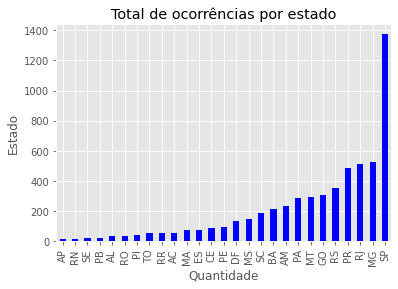

In [35]:
# gráfico de barras, ocorrências por estado
df['ocorrencia_uf'].value_counts(ascending=True).plot.bar(title="Total de ocorrências por estado", color="blue")
plt.xlabel('Quantidade')
plt.ylabel('Estado');

# para salvar uma imagem do gráfico
# plt.savefig("ocorrencias_por_estado.png")

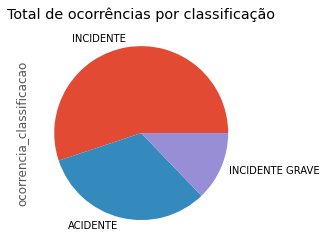

In [36]:
# gráfico de pizza, ocorrência x classificação
df['ocorrencia_classificacao'].value_counts().plot.pie(title="Total de ocorrências por classificação");

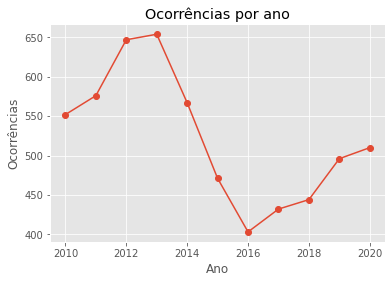

In [37]:
# gráfico de linha, ocorrências por ano
df.groupby(df['ocorrencia_dia_hora'].dt.year).size().plot(title="Ocorrências por ano", marker="o")
plt.xlabel('Ano')
plt.ylabel('Ocorrências');

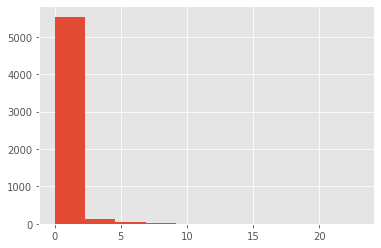

In [38]:
# histograma de recomendações
plt.hist(df['total_recomendacoes']);

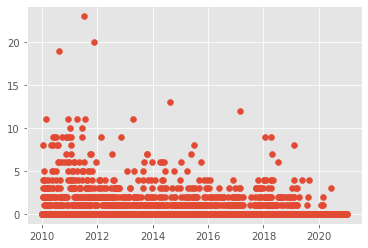

In [39]:
# gráfico de dispersão de recomendações
plt.scatter(x=df['ocorrencia_dia_hora'], y=df['total_recomendacoes']);

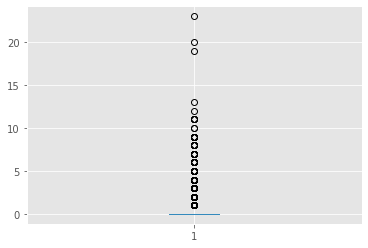

In [40]:
# bloxplot de recomendações
plt.boxplot(df['total_recomendacoes']);